# 斯坦福 EE364a 凸优化笔记 - 第二部分：L5-8 对偶理论 

教材: Convex Optimization by Boyd & Vandenberghe 核心目标: 识别、表述并求解凸优化问题。

## Lecture 5: Convex Optimization 
核心内容：
- 标准形式：standard form (convex) optimization problem
- 线性优化：linear optimization
- 二次优化：quadratic optimization
- 几何规划：geometric programming
- 半定优化：semidefinite optimization
- 拟凸优化：quasiconvex optimization
- 向量/多目标优化：vector and multicriterion optimization

这 7 类的共同点：都能归约为“凸可行域 + 凸目标（或拟凸目标）”，因此 局部最优=全局最优，且有系统化数值方法

### 4.1 优化问题标准形式 (Optimization Problem in Standard Form)

#### 标准形式
$$\begin{aligned}
\min_{x} \quad & f_0(x) \\
\text{s.t.} \quad & f_i(x) \leq 0, \quad i = 1, \dots, m \\
& h_i(x) = 0, \quad i = 1, \dots, p
\end{aligned}$$

- $x \in \mathbb{R}^n$：优化变量 (Optimization variable)。、
- $f_0: \mathbb{R}^n \to \mathbb{R}$：目标函数 (Objective function)。
- $f_i(x) \leq 0$：不等式约束 (Inequality constraints)。
- $h_i(x) = 0$：等式约束 (Equality constraints)。

$x$ 为优化变量，$p^*$ 为最优值。如果无解则 $p^{*}=\infty$ (不可行)，如果无下界则 $p^{*}=-\infty$

#### 最优解
- 最优值 (Optimal Value) $p^*$：
$$p^* = \inf \{ f_0(x) \mid f_i(x) \le 0, \; h_i(x) = 0 \}$$
在这个基础上，寻找最优解 (Finding an optimal solution) 等价于寻找满足以下所有条件的 $x$：$$\begin{aligned}
f_i(x) &\le 0, \quad i = 1, \dots, m \quad &(\text{可行性/Feasibility}) \\
h_i(x) &= 0, \quad i = 1, \dots, p \quad &(\text{可行性/Feasibility}) \\
f_0(x) &= p^* \quad &(\text{最优性/Optimality})
\end{aligned}$$

或者用集合论的语言写成最优解集 $X_{\text{opt}}$：$$X_{\text{opt}} = \{ x \in \mathbb{R}^n \mid f_i(x) \le 0, \; h_i(x) = 0, \; f_0(x) = p^* \}$$

Note: Boyd 的《凸优化》）中，使用 $\inf$（Infimum，下确界）而不是 $\min$（Minimum，最小值），是为了严谨性。 “最小值”必须由某个具体的 $x$ 取到，而“下确界”只需要是数值上的逼近极限。



- Locally Optimal
局部最优 (Locally Optimal) 的定义强调的是“邻域”内的比较。它不一定是整个定义域里最好的，但在它周围的一小块区域里是最好的。
设优化问题的可行域 (Feasible Set) 为 $\mathcal{D}$：$$\mathcal{D} = \{ x \in \mathbb{R}^n \mid f_i(x) \le 0, \; h_i(x) = 0 \}$$一个点 $x$ 被称为局部最优解 (Locally Optimal Point)，如果满足以下两个条件：
    - 可行性 (Feasibility)$$x \in \mathcal{D}$$(即 $x$ 必须满足所有约束条件)
    - 局部最优性 (Local Optimality)存在一个半径 $R > 0$，使得对于所有满足距离条件的可行点 $z$，都有 $f_0(x)$ 最小：$$f_0(x) \le f_0(z), \quad \forall z \in \mathcal{D} \text{ satisfying } \|z - x\|_2 \le R$$

- 关键性质: 对于凸问题，任何局部最优解都是全局最优解。

#### 隐式约束 (Implicit constraints)
课件中提到定义域可以有隐式约束

$x\in\mathcal{D}=\bigcap_{i=0}^{m}dom~f_{i}\cap\bigcap_{i=1}^{p}dom~h_{i}$
$\mathcal{D}$ 称为问题的 定义域 (domain)。

约束 $f_{i}(x)\le0$, $h_{i}(x)=0$ 是 显式约束 (explicit constraints)。如果没有显式约束 ($m=p=0$)，则称该问题为 无约束 (unconstrained) 的。
- 例子：

minimize $f_{0}(x)=-\sum_{i=1}^{k}log(b_{i}-a_{i}^{T}x)$这是一个包含隐式约束 $a_{i}^{T}x < b_{i}$ 的无约束问题。

#### 可行性定义(Feasibility)
给定约束函数$f_i:\mathbb{R}^n\to\mathbb{R}$（不等式）与$h_i:\mathbb{R}^n\to\mathbb{R}$（等式），可行性问题是
$$\text{find } x\in\mathbb{R}^n \quad
\text{s.t.}\quad
f_i(x)\le 0,\ i=1,\dots,m,\qquad
h_i(x)=0,\ i=1,\dots,p$$
定义可行域
$$\mathcal{F}\;:=\;\{x\in\mathbb{R}^n \mid f_i(x)\le 0,\ i=1,\dots,m;\ \ h_i(x)=0,\ i=1,\dots,p\}$$

作为优化问题的特例：
$$\begin{aligned}
\min_{x\in\mathbb{R}^n}\quad & 0 \\
\text{s.t.}\quad & f_i(x)\le 0,\ i=1,\dots,m,\\
& h_i(x)=0,\ i=1,\dots,p.
\end{aligned}$$
其最优值（optimal value）按定义是:
$$p^* \;:=\; \inf\{\,0 \mid x\in\mathcal{F}\,\}
\;=\;
\inf_{x\in\mathcal{F}} 0$$

可行/不可行时的 $p^*$
- 若 $F \neq \emptyset$（可行），则
$$
p^* = \inf_{x \in F} 0 = 0.
$$
- 若 (F = \emptyset)（不可行），则
$$
p^* = \inf_{x \in \emptyset} 0 ;=; \inf \emptyset ;=; +\infty.
$$

#### **Convex optimization problem**
标准形式的凸优化问题:
$$\begin{aligned}
\min_x\;\; & f_0(x)\\
\text{s.t.}\;\; & f_i(x)\le 0,\quad i=1,\dots,m,\\
                & a_i^{T}x = b_i,\quad i=1,\dots,p.
\end{aligned}$$

- $f_0$, $f_1$...$f_m$ 都是凸的，等式约束是 仿射 (affine) 的
- 如果 $f_0$ 是拟凸的 (且 $f_1, ..., f_m$ 是凸的)，则该问题是 拟凸 (quasiconvex) 的。写成
$$\begin{aligned}
\min_x\;\; & f_0(x)\\
\text{s.t.}\;\; & f_i(x)\le 0,\quad i=1,\dots,m,\
& Ax = b.
\end{aligned}$$

- 重要性质: 凸优化问题的可行集是凸集。
---
为什么等式约束一定强调“仿射”？
- 约束 $f_i(x)\le 0$ 在 (f_i) 凸时给出凸集（凸函数的 sublevel set 是凸的）。
- 但等式约束 $g(x)=0$ 一般不会保持凸性，除非 (g) 是仿射。反例：
$x^2 = 1 ;\Rightarrow; x \in {-1, 1}$
这是非凸集合。
- 等式约束就是“线性方程组”.
---

- 例子

minimize $f_{0}(x)=x_{1}^{2}+x_{2}^{2}$

subject to $f_{1}(x)=x_{1}/(1+x_{2}^{2})\le0$, $h_{1}(x)=(x_{1}+x_{2})^{2}=0$

$f_0$ 是凸的；可行集 $\{(x_1, x_2) | x_1 = -x_2 \le 0\}$ 是凸的。 但这 ***不是*** 一个凸问题,$f_1$ 不是凸的，$h_1$ 不是仿射的。

---
先用$h1(x)=0$ 解出 $(x_1+x_2)^2=0 \iff x_1+x_2=0 \iff x_1=-x_2$。
再看$f_1(x) \le 0$
$$1+x_2^2>0 \quad \forall x_2$$
$$\frac{x_1}{1+x_2^2}\le 0 \iff x_1\le 0$$
合并
$$x_1=-x_2,\quad x_1\le 0$$
所以可行集是
$$\mathcal{F}=\{(x_1,x_2)\mid x_1=-x_2\le 0\}= \{(t,-t)\mid t\le 0\}$$

这就是过原点的一条直线上的半射线，显然是凸集（两点连线仍在半射线上）。

再看$f_1$是否为凸： 算Hessian矩阵是本办法，用Boyd上节课的降维射线判定法
> 如果 $f(x)$ 是凸的，那么它沿任何一条直线的限制函数也必须凸。
即 $g(t) = f(x_0 + t v)$ 必须对 $t$ 凸。

选一条最简单的直线：固定 $x_1 = 1$，令 $x_2 = t$。则
$$g(1) = \tfrac{1}{2}, \quad g(-1) = \tfrac{1}{2}, \quad g(0) = 1.$$

用中点凸性检验：中点是 $0$，但$g(0) = 1 \not\le \dfrac{g(1) + g(-1)}{2} = \tfrac{1}{2}.$ 显然不凸

---


####  可微函数最优性准则

$x$ 是最优的当且仅当对于所有可行解 $y$ 有 $\nabla f_{0}(x)^{T}(y-x)\ge0$。

如果非零，$\nabla f_0(x)$ 定义了可行集 $X$ 在 $x$ 处的一个支撑超平面。

**数学解释**：

凸函数满足
$$f_0(y)\ \ge\ f_0(x)+\nabla f_0(x)^T (y-x)\quad(\forall x,y)$$
如果在某个点 𝑥 上还满足
$$\nabla f_0(x)^T(y-x)\ge 0\quad(\forall y\in X)$$
那么对所有可行$y\in X$:
$$f_0(y)\ge f_0(x)+\underbrace{\nabla f_0(x)^T(y-x)}_{\ge 0}\ \ge\ f_0(x)$$
$x$ 就是全局最小点

**几何解释**：
> 对凸、可微的 $f(x)$, 在凸可行集 𝑋上最小化时，最优点 𝑥 的梯度$\nabla f_0(x)$ 必须“朝着把你推出可行域的方向”，使得你在可行域里找不到任何能让目标下降的方向。

数学公式 $\nabla f_{0}(x)^{T}(y-x) \ge 0$ 是两个向量的内积
- 向量 A：$\nabla f_0(x)$（地形原本的上坡方向）。
- 向量 B：$y - x$（尝试迈步的方向）
由内积意义，如果内积 $\ge 0$意味着迈步的方向 ($y-x$) 和上坡方向 ($\nabla f_0$) 大致相同。
- 结论： 因为 $x$ 已经是最小值了，所以所有可行的迈步方向 ($y-x$) 都必须是“上坡”的。所以内积必须 $\ge 0$。

**支撑超平面**

定义超平面（通过点 $x$，法向量是 $\nabla f_0(x)$）：
$$
H = \{\, z \mid \nabla f_0(x)^T (z - x) = 0 \,\}.
$$

最优性准则要求
$$
\nabla f_0(x)^T (y - x) \ge 0,\quad \forall y \in X
$$
等价于：
$$
X \subseteq \{\, z \mid \nabla f_0(x)^T (z - x) \ge 0 \,\}.
$$

也就是：整个可行集 $X$ 都落在某一个半空间里；这个半空间的“边界”就是超平面 $H$；并且 $x \in X \cap H$（因为取 $y = x$ 等号成立）。这正是 “$H$ 在 $x$ 处支撑 $X$” 的定义：一张平面贴住集合 $X$ 的边界，集合完全在平面的一侧。

直觉：$\nabla f_0(x)$ 指向“如果想往 $-\nabla f_0(x)$ 走（最陡下降方向）就会立刻离开可行集”的方向。所以可行集在 $x$ 处有一个“挡板”，这个挡板就是支撑超平面。

---
例子：
$x\in\mathbb{R}^2,\ \min \|x\|^2 \ \text{s.t.}\ x_1 \ge 1.$

最优点是 $x^* = (1,0)$。梯度 $\nabla f(x)=2x$，所以 $\nabla f(x^*) = (2,0)$。

支撑超平面：
$$
(2,0)^T\bigl((z_1,z_2)-(1,0)\bigr)=0 \;\Longleftrightarrow\; z_1=1.
$$

可行集是半平面 $z_1 \ge 1$，确实完全在直线$x_1 = 1$的一侧，而且直线在 $x^*$ 处“贴住”它。

---

**特例**
- 无约束问题: $x$ 是最优的当且仅当:$x\in dom~f_{0}$, $\nabla f_{0}(x)=0$

- 等式约束问题: minimize $f_0(x)$ subject to $Ax=b$ $x$ 是最优的当且仅当存在 $v$ 使得:$x\in dom~f_{0}, Ax=b, \nabla f_{0}(x)+A^{T}\nu=0$
    - 数学解释： 梯度对所有可行方向都正交
    ---
    对等式约束，可行集 $X = \{x \mid Ax = b\}$ 是仿射集（凸）。从可行点 $x$ 出发，能保持可行的方向 $d$ 必须满足：
    $$
    A(x + t d) = b \;\Rightarrow\; A x + t\,A d = b \;\Rightarrow\; A d = 0.
    $$
    所以可行方向集合是
    $$
    T_X(x) = \{\, d \mid A d = 0 \} = \mathrm{Null}(A).
    $$

    “一阶必要条件”写成方向形式：
    $$
    \nabla f(x)^T d \ge 0,\quad \forall d \in \mathrm{Null}(A).
    $$
    但 $\mathrm{Null}(A)$ 是子空间，若对 $d$ 成立也必须对 $-d$ 成立，于是只能是
    $$
    \nabla f(x)^T d = 0,\quad \forall d \in \mathrm{Null}(A).
    $$

    这等价于线代结论：
    $$
    \nabla f(x) \in \mathrm{Null}(A)^\perp = \mathrm{Range}(A^T).
    $$
    因此存在 $\nu$ 使得
    $$
    \nabla f(x) = -A^T \nu \;\Longleftrightarrow\; \nabla f(x) + A^T \nu = 0.
    $$

    也就是说梯度对所有可行方向都正交

    --- 

    - 几何解释：在等式约束 $Ax = b$ 上只能沿切向方向移动（$A d = 0$），最优点要求“沿切向一阶不能下降（first-order necessary condition, FONC）”，所以 $\nabla f(x^*)$ 必须完全指向法向空间（$\mathrm{Range}(A^T)$），这等价于存在 $\nu$ 使
$$
\nabla f(x^*) + A^T \nu = 0.
$$


- 非负象限上的最小化: minimize $f_0(x)$ subject to $x \ge 0$， $x$ 是最优的当且仅当:$x \in dom f_0, x \ge 0$, 且满足 $$\begin{cases} \nabla f_0(x)_i \ge 0 & x_i=0 \\ \nabla f_0(x)_i = 0 & x_i > 0 \end{cases}$$
    - 几何解释：如果最小值在内部，那么梯度为0，说明已经在开阔的地带了；如果最小值在边界，则梯度>0, 说明函数还有增长的趋势，梯度必须>0 此来阻止我们往右边移动（因为往右边走函数值会更大）。

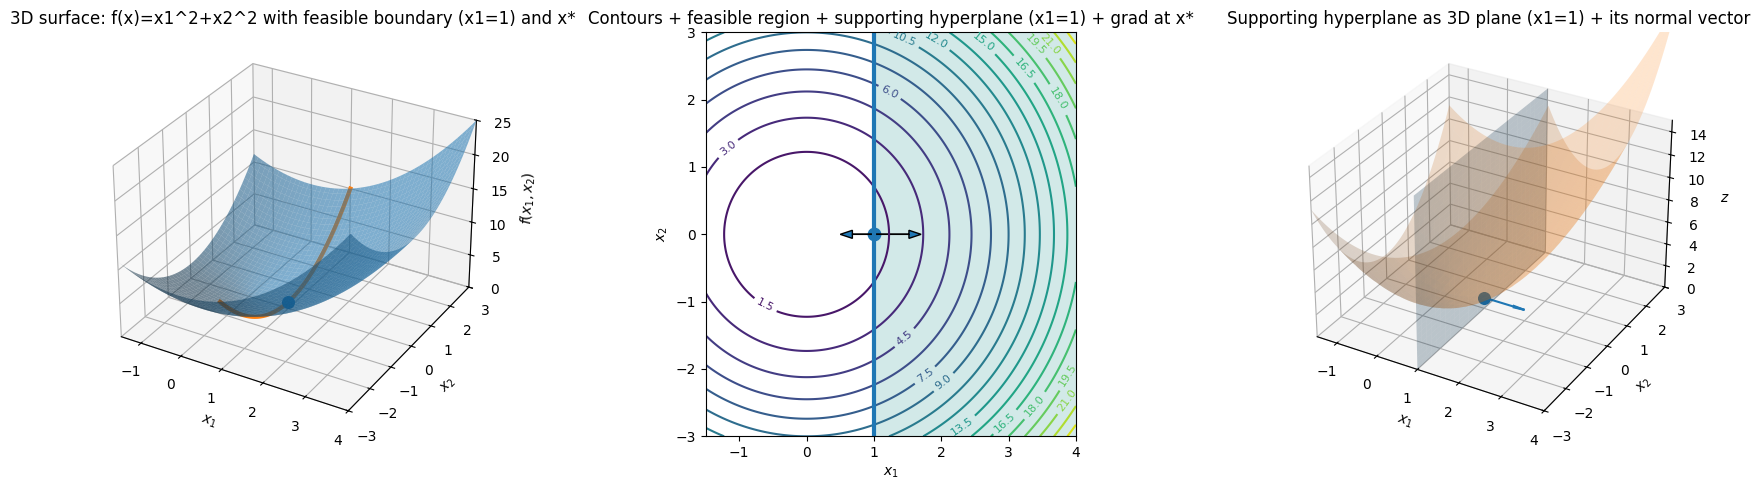

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

def f(x1, x2):
    return x1**2 + x2**2

x_star = np.array([1.0, 0.0])
grad = np.array([2 * x_star[0], 2 * x_star[1]])
x1 = np.linspace(-1.5, 4.0, 200)
x2 = np.linspace(-3.0, 3.0, 200)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
feasible = X1 >= 1.0
z_star = f(x_star[0], x_star[1])

fig = plt.figure(figsize=(18, 5))

# Col 1: 3D surface + boundary + x*
ax1 = fig.add_subplot(1, 3, 1, projection="3d")
ax1.plot_surface(X1, X2, Z, alpha=0.55, rstride=4, cstride=4, linewidth=0)
x2_line = np.linspace(-3.0, 3.0, 200)
x1_line = np.ones_like(x2_line)
z_line = f(x1_line, x2_line)
ax1.plot(x1_line, x2_line, z_line, linewidth=3)
ax1.scatter([x_star[0]], [x_star[1]], [z_star], s=70)
ax1.set_xlabel("$x_1$"); ax1.set_ylabel("$x_2$"); ax1.set_zlabel("$f(x_1,x_2)$")
ax1.set_title("3D surface: f(x)=x1^2+x2^2 with feasible boundary (x1=1) and x*")
ax1.set_xlim(-1.5, 4.0); ax1.set_ylim(-3.0, 3.0); ax1.set_zlim(0.0, np.max(Z))

# Col 2: Contour + feasible + supporting line + grad
ax2 = fig.add_subplot(1, 3, 2)
cs = ax2.contour(X1, X2, Z, levels=18)
ax2.clabel(cs, inline=True, fontsize=8)
ax2.contourf(X1, X2, feasible.astype(float), levels=[0.5, 1.5], alpha=0.2)
ax2.plot(np.ones_like(x2), x2, linewidth=3)
ax2.scatter([x_star[0]], [x_star[1]], s=80)
ax2.arrow(x_star[0], x_star[1], grad[0]*0.35, grad[1]*0.35,
          head_width=0.12, head_length=0.18, length_includes_head=True)
ax2.arrow(x_star[0], x_star[1], -grad[0]*0.25, -grad[1]*0.25,
          head_width=0.12, head_length=0.18, length_includes_head=True)
ax2.set_xlabel("$x_1$"); ax2.set_ylabel("$x_2$")
ax2.set_title("Contours + feasible region + supporting hyperplane (x1=1) + grad at x*")
ax2.set_xlim(-1.5, 4.0); ax2.set_ylim(-3.0, 3.0); ax2.set_aspect("equal", adjustable="box")

# Col 3: 3D plane x1=1 + normal
ax3 = fig.add_subplot(1, 3, 3, projection="3d")
x2p = np.linspace(-3.0, 3.0, 30)
zp = np.linspace(0.0, np.max(Z)*0.6, 30)
X2p, Zp = np.meshgrid(x2p, zp)
X1p = np.ones_like(X2p)
ax3.plot_surface(X1p, X2p, Zp, alpha=0.25, rstride=1, cstride=1, linewidth=0)
ax3.plot_surface(X1, X2, Z, alpha=0.20, rstride=8, cstride=8, linewidth=0)
ax3.scatter([x_star[0]], [x_star[1]], [z_star], s=70)
n3 = np.array([1.0, 0.0, 0.0])
ax3.quiver(x_star[0], x_star[1], z_star, n3[0], n3[1], n3[2], length=1.0, normalize=True)
ax3.set_xlabel("$x_1$"); ax3.set_ylabel("$x_2$"); ax3.set_zlabel("$z$")
ax3.set_title("Supporting hyperplane as 3D plane (x1=1) + its normal vector")
ax3.set_xlim(-1.5, 4.0); ax3.set_ylim(-3.0, 3.0); ax3.set_zlim(0.0, np.max(Z)*0.6)

plt.tight_layout()
plt.show()


A = [[1. 2.]]
b = [1.5]
x* = [0.3 0.6]
nu = [-0.6]
Primal residual ||Ax*-b|| = 2.220446049250313e-16
Stationarity residual ||grad f(x*) + A^T nu|| = 0.0

Decomposition of grad f(x*) into normal + tangent parts:
grad = [0.6 1.2]
proj onto span(A^T) = [0.6 1.2]
tangent component (should be ~0) = [0. 0.]
||tangent component|| = 0.0

Check orthogonality with feasible direction d (Ad=0):
A d = [0.]
grad^T d = 0.0


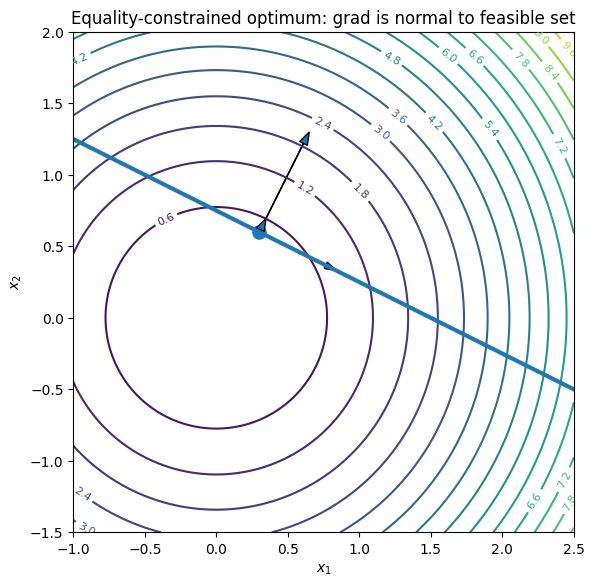

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Example: minimize f(x)=||x||^2  subject to  A x = b
# =========================
A = np.array([[1.0, 2.0]])   # shape (1,2)
b = np.array([1.5])          # shape (1,)

# Objective: f(x) = x1^2 + x2^2, grad f(x) = 2x
def f(x):
    return x[0]**2 + x[1]**2

def grad_f(x):
    return 2.0 * x

# --- Solve via KKT analytically ---
# KKT: 2x + A^T nu = 0,  Ax=b
AA_T = A @ A.T
nu = -2.0 * np.linalg.solve(AA_T, b)     # (1,)
x_star = A.T @ np.linalg.solve(AA_T, b)  # (2,)

# --- Verify KKT residuals ---
r_primal = A @ x_star - b
r_stationarity = grad_f(x_star) + A.T @ nu

print("A =", A)
print("b =", b)
print("x* =", x_star)
print("nu =", nu)
print("Primal residual ||Ax*-b|| =", float(np.linalg.norm(r_primal)))
print("Stationarity residual ||grad f(x*) + A^T nu|| =", float(np.linalg.norm(r_stationarity)))

# --- Show that grad is in Range(A^T) ---
g = grad_f(x_star)
aT = A.T[:, 0]  # normal direction
proj_g = aT * (aT @ g) / (aT @ aT)
orth_g = g - proj_g
print("\nDecomposition of grad f(x*) into normal + tangent parts:")
print("grad =", g)
print("proj onto span(A^T) =", proj_g)
print("tangent component (should be ~0) =", orth_g)
print("||tangent component|| =", float(np.linalg.norm(orth_g)))

# A direction in Null(A) (tangent direction): d=[2,-1] since [1,2]·[2,-1]=0
d = np.array([2.0, -1.0])
print("\nCheck orthogonality with feasible direction d (Ad=0):")
print("A d =", A @ d)
print("grad^T d =", float(g @ d))

# =========================
# Plot: contour of f + feasible line + x* + grad and normal
# =========================
x1 = np.linspace(-1.0, 2.5, 400)
x2 = np.linspace(-1.5, 2.0, 400)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

fig, ax = plt.subplots(figsize=(7.5, 6.5))
cs = ax.contour(X1, X2, Z, levels=18)
ax.clabel(cs, inline=True, fontsize=8)

# Feasible line: x1 + 2 x2 = 1.5
x2_line = (b[0] - A[0,0]*x1) / A[0,1]
ax.plot(x1, x2_line, linewidth=3)

# Mark x*
ax.scatter([x_star[0]], [x_star[1]], s=90)

# Arrows: A^T (normal), grad f(x*), and a tangent feasible direction d
scale = 0.35
ax.arrow(x_star[0], x_star[1], aT[0]*scale, aT[1]*scale,
         head_width=0.06, head_length=0.09, length_includes_head=True)
ax.arrow(x_star[0], x_star[1], g[0]*0.08, g[1]*0.08,
         head_width=0.06, head_length=0.09, length_includes_head=True)

d_unit = d / np.linalg.norm(d)
ax.arrow(x_star[0], x_star[1], d_unit[0]*0.6, d_unit[1]*0.6,
         head_width=0.05, head_length=0.08, length_includes_head=True)

ax.set_aspect("equal", adjustable="box")
ax.set_xlim(-1.0, 2.5)
ax.set_ylim(-1.5, 2.0)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Equality-constrained optimum: grad is normal to feasible set")
plt.show()
